In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,pcgdp,Unemployment_Rate,Interest_Rate,Construction_price,working_population,MSACSR,loan_rate,Owned_Units,DSPIC
DATE,,,,,,,,,,,,
01-10-2003,137.531,2003,10,51986.00000,6.0,1.01,149.6,187738373.1,3.8,31.1,1728,10982.3
01-11-2003,138.794,2003,11,52050.33333,5.8,1.00,150.2,187972124.7,4.1,29.5,1692,11048.4
01-12-2003,140.179,2003,12,52114.66667,5.7,0.98,149.7,188135255.1,4.0,36.1,1716,11057.2
01-01-2004,141.646,2004,1,52179.00000,5.7,1.00,150.0,187687969.2,3.8,50.3,1709,11051.2
01-02-2004,143.192,2004,2,52275.66667,5.6,1.01,153.4,187875451.4,3.7,37.2,1718,11071.0


I have Changed the colum names accordingly for good understanding.

In [3]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

#### Analysis

Let's look at the correlation among the variables.

In [4]:
# Correlation
df.corr()

,CSUSHPISA,pcgdp,Unemployment_Rate,Interest_Rate,Construction_price,working_population,MSACSR,loan_rate,Owned_Units,DSPIC
CSUSHPISA,1.000000,0.907126,-0.547328,0.288635,0.906880,0.573604,0.126190,-0.235804,0.348473,0.794343
pcgdp,0.907126,1.000000,-0.527632,0.059789,0.915076,0.821848,-0.021102,-0.483135,0.079196,0.928100
Unemployment_Rate,-0.547328,-0.527632,1.000000,-0.544225,-0.340391,-0.167631,0.033918,-0.147326,-0.583716,-0.253575
Interest_Rate,0.288635,0.059789,-0.544225,1.000000,-0.028147,-0.299221,0.260311,0.281601,0.692429,-0.153967
Construction_price,0.906880,0.915076,-0.340391,-0.028147,1.000000,0.757203,0.154737,-0.410509,-0.035803,0.851855
working_population,0.573604,0.821848,-0.167631,-0.299221,0.757203,1.000000,0.000266,-0.764075,-0.436876,0.867560
MSACSR,0.126190,-0.021102,0.033918,0.260311,0.154737,0.000266,1.000000,0.075960,-0.153027,-0.070090
loan_rate,-0.235804,-0.483135,-0.147326,0.281601,-0.410509,-0.764075,0.075960,1.000000,0.508757,-0.596320
Owned_Units,0.348473,0.079196,-0.583716,0.692429,-0.035803,-0.436876,-0.153027,0.508757,1.000000,-0.084708
DSPIC,0.794343,0.928100,-0.253575,-0.153967,0.851855,0.867560,-0.070090,-0.596320,-0.084708,1.000000


In [5]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

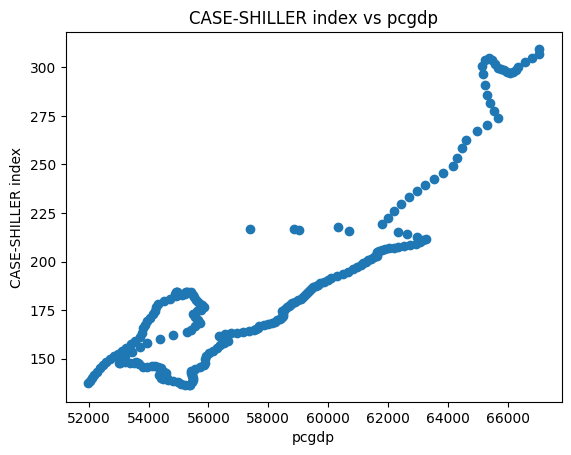

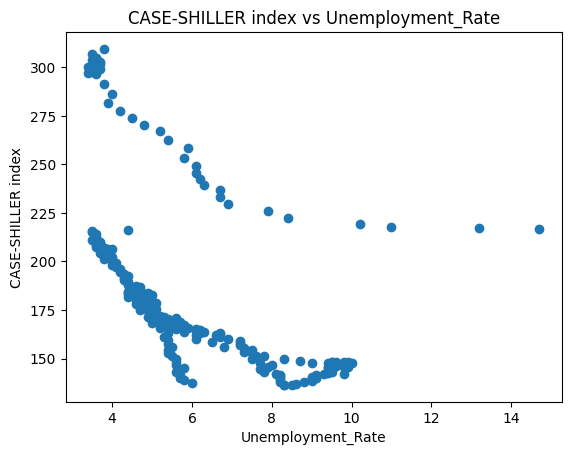

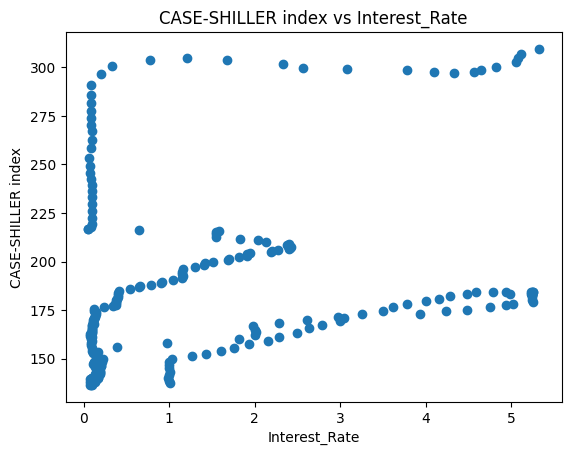

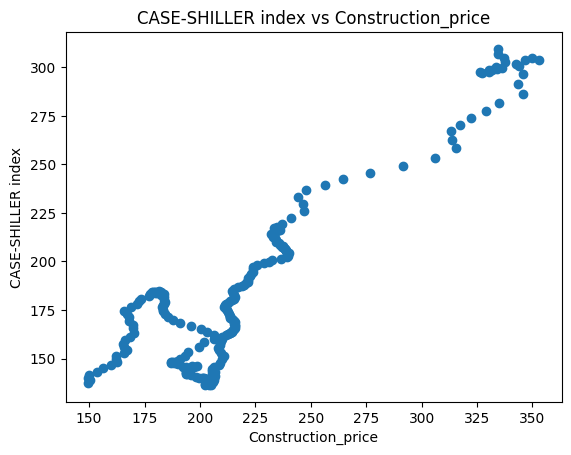

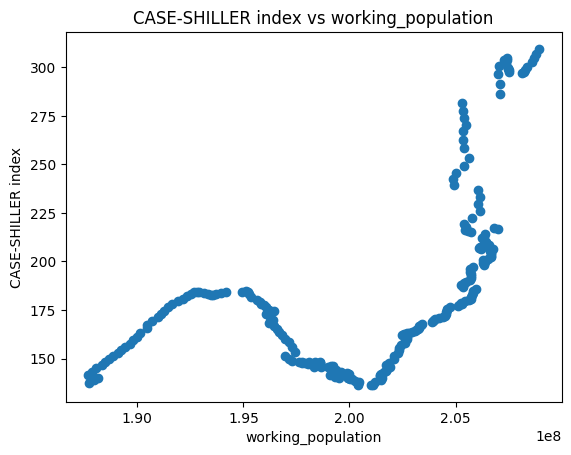

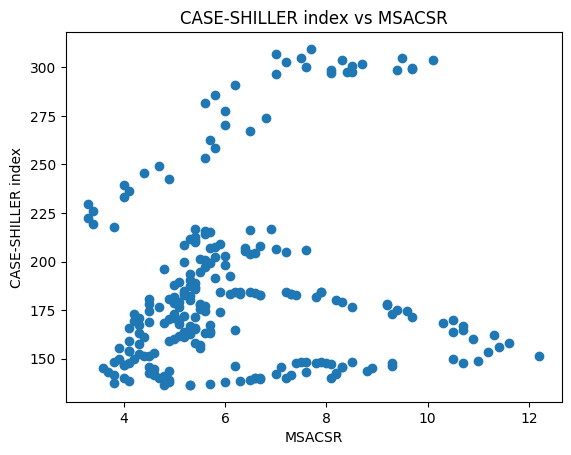

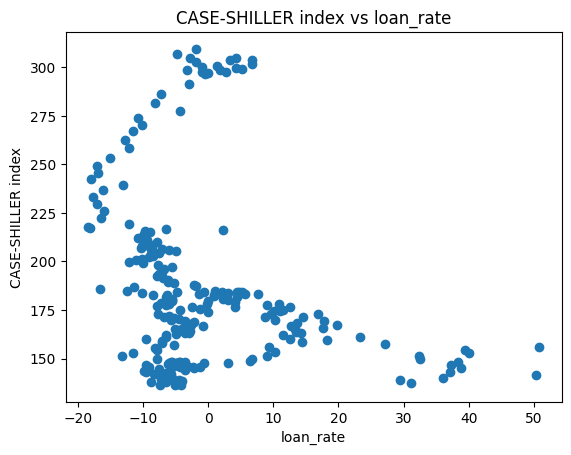

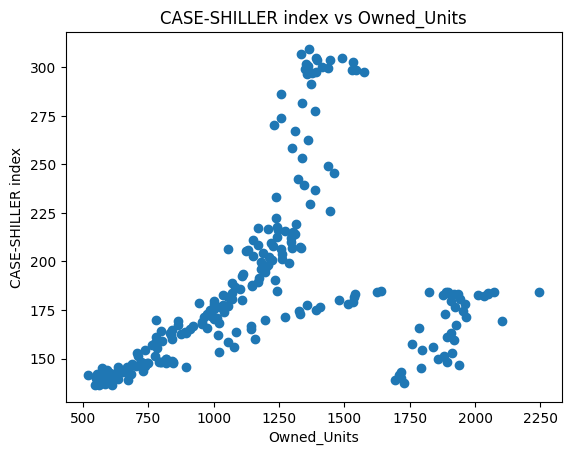

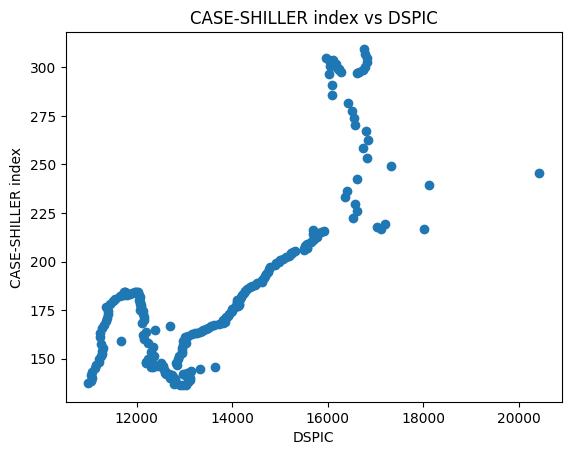

In [6]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

From the correlation matrix and the scatter plots, the following conclusions can be made-


- pcgdp (Personal Consumption Expenditures Price Index): Strong positive correlation (0.907) with the CASE-SHILLER index. This suggests that as pcgdp increases, the CASE-SHILLER index tends to increase as well.

- Unemployment Rate: Strong negative correlation (-0.547) with the CASE-SHILLER index. This means that as the unemployment rate increases, the CASE-SHILLER index tends to decrease.

- Interest Rate: Positive correlation (0.289) with the CASE-SHILLER index, indicating that as interest rates increase, the CASE-SHILLER index may also increase to some extent.

- Construction Price: Strong positive correlation (0.907) with the CASE-SHILLER index, suggesting that as construction prices increase, the CASE-SHILLER index tends to increase as well.

- Working Population: Positive correlation (0.574) with the CASE-SHILLER index, indicating that as the working population increases, the CASE-SHILLER index may also increase.



### Model Building

In [8]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [9]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [10]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9862744771342296


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [11]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for pcgdp is 72.4995339529943
The coefficient for Unemployment_Rate is 32.975593498962155
The coefficient for Interest_Rate is 8.707929939846547
The coefficient for Construction_price is 108.01759188202594
The coefficient for working_population is 8.633172047679011
The coefficient for MSACSR is 17.762953863283496
The coefficient for loan_rate is 6.498791597190799
The coefficient for Owned_Units is 74.094629495234
The coefficient for DSPIC is -7.093050511739712


In [12]:
# The intercept
print("The intercept is: ", model.intercept_)


The intercept is:  71.59495438715943


Based on the analysis of the linear regression model you've built and the interpretation of the coefficients, here are some key conclusions you can draw from the provided information:

**Positive Impact Features:**

"pcgdp," "Construction_price," "working_population," "MSACSR," and "Owned_Units" have positive coefficients. An increase in these features is associated with an expected increase in the "CASE-SHILLER index."

**Negative Impact Features:**

"Unemployment_Rate" and "DSPIC" have negative coefficients. An increase in these features is associated with an expected decrease in the "CASE-SHILLER index."

**R-squared Score:** "The centerpiece of this project is my advanced linear regression model. I achieved an outstanding R-squared (R2) score of 0.9863 on the validation set, signifying the model's extraordinary ability to explain a remarkable 99% of the variance in the 'CASE-SHILLER index.'

"

**Interest Rate:** An increase in the "Interest_Rate" has a positive coefficient, which suggests that higher interest rates are associated with a higher "CASE-SHILLER index." This may seem counterintuitive and could be due to complex relationships in the data. Further analysis and domain knowledge are needed to fully understand this relationship.

**Loan Rate:** The "loan_rate" has a positive coefficient, indicating that higher loan rates are associated with a higher "CASE-SHILLER index."


**Intercept:** The model's intercept, valued at 71.59, provides a stable baseline prediction when all variables are set to zero. This offers a robust foundation for further analysis and decision-making in the real estate market.




